In [ ]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.path.join(os.getcwd(), ".."), ".."))
sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
from data_generation.models.tech_substitution import TechnologySubstitution, TechSubNumericalSolver
from data_generation.simulations.grid import Grid, fractional_transformation, tangent_transformation
from data_generation.simulations.simulator import Simulator
from data_generation.simulations.coverage_analyzer import CoverageAnalyzer

In [3]:
g = Grid([(0, np.inf), (0, np.inf)], [5, 5],[fractional_transformation(3), fractional_transformation(3)])

In [4]:
X, _ = g.get_initial_conditions(num_points_per_cell=2)
Z = g.transform(X)

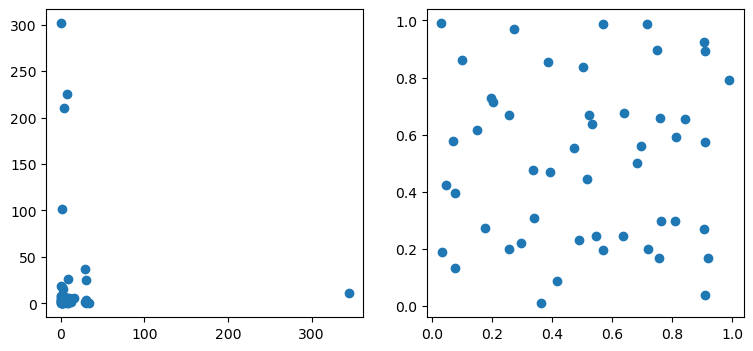

In [5]:
figure, axis = plt.subplots(1, 2, figsize=(9,4))
axis[0].scatter(X[:,0], X[:,1])
axis[1].scatter(Z[:,0], Z[:,1])
plt.show()

In [6]:
z_analyzer = CoverageAnalyzer(n_bins=10)

({'occupied_bins': np.int64(45),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.45),
  'max_density': np.float64(2.0),
  'min_density': np.float64(1.0),
  'hull_volume': 0.8585141510722529,
  'effective_volume': np.float64(1.0419573160238225)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

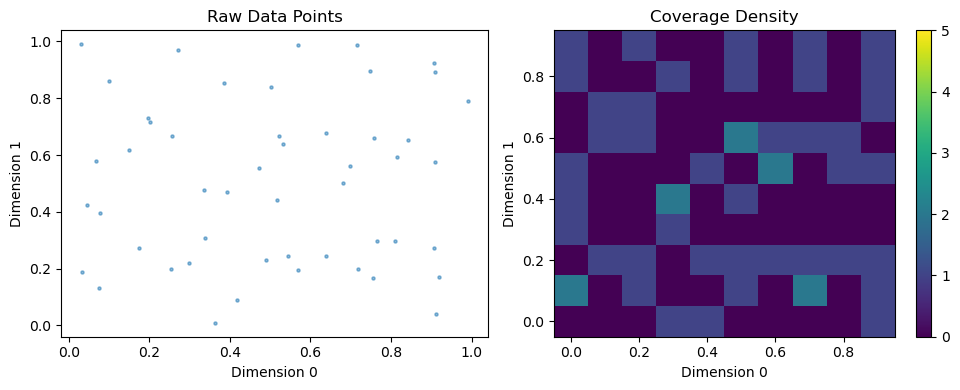

In [7]:
z_analyzer.compute_coverage_metrics(Z), z_analyzer.plot_2d_coverage(Z)

In [ ]:
model = TechnologySubstitution()
solver = TechSubNumericalSolver(model)
sim = Simulator(g, model, solver)

In [9]:
control = 0.5

In [10]:
results = sim.simulate(control,delta_t=0.1, num_samples_per_cell=3, num_steps= 500, save_result=False)

Simulation complete:
- 75 samples × 500 timesteps = 37500 total rows
- State dimensions: 2
- Control dimensions: 1


In [11]:
initial_conditions = results.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions = initial_conditions[['x0', 'x1']].to_numpy()
all_data_points = results[['x0', 'x1']].to_numpy()

In [12]:
np.max(all_data_points[:,0])

np.float64(454.559026904125)

In [13]:
Z0 = g.transform(initial_conditions)
Zall = g.transform(all_data_points)
Zall.shape, np.max(Z0[:,0]), np.max(Zall[:,0])

((37500, 2), np.float64(0.9926836626924784), np.float64(0.993443468878107))

({'occupied_bins': np.int64(56),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.56),
  'max_density': np.float64(3.0),
  'min_density': np.float64(1.0),
  'hull_volume': 0.8542770973887801,
  'effective_volume': np.float64(1.0767543369738521)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

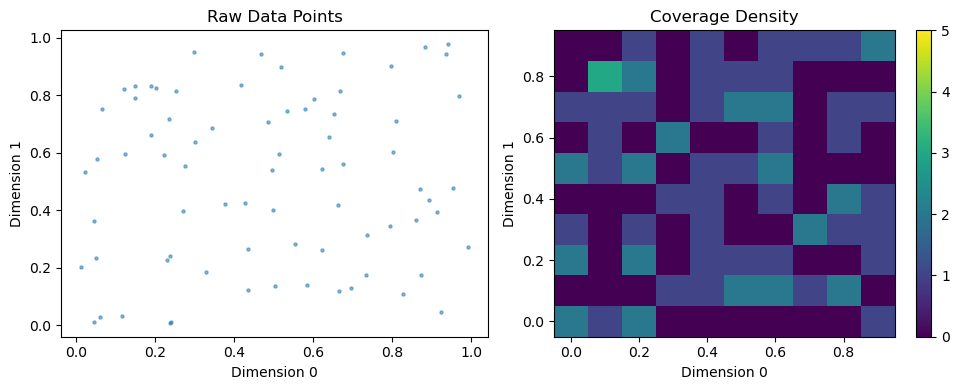

In [14]:
z_analyzer.compute_coverage_metrics(Z0), z_analyzer.plot_2d_coverage(Z0)

({'occupied_bins': np.int64(97),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.97),
  'max_density': np.float64(2678.0),
  'min_density': np.float64(2.0),
  'hull_volume': 0.9287869376101441,
  'effective_volume': np.float64(0.6447250876657636)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

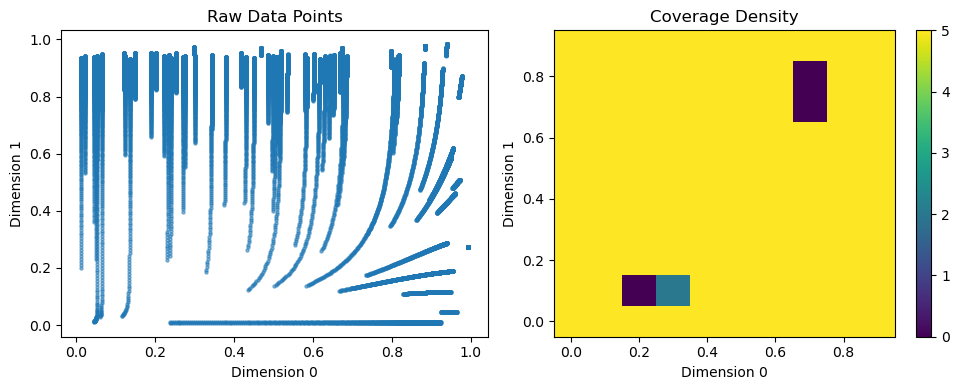

In [15]:
z_analyzer.compute_coverage_metrics(Zall), z_analyzer.plot_2d_coverage(Zall)

In [16]:
37500 , (10**2*19*19) # I want to sample almost the same amount of datapoints for comparison

(37500, 36100)

In [17]:
g2 = Grid([(0, np.inf), (0, np.inf)], [10, 10],[fractional_transformation(3), fractional_transformation(3)])
sim2 = Simulator(g2, model, solver)
results2 = sim2.simulate(control,delta_t=0.1, num_samples_per_cell=19, num_steps= 19, save_result=False)

Simulation complete:
- 1900 samples × 19 timesteps = 36100 total rows
- State dimensions: 2
- Control dimensions: 1


In [18]:
initial_conditions2 = results2.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions2 = initial_conditions2[['x0', 'x1']].to_numpy()
all_data_points2 = results2[['x0', 'x1']].to_numpy()
Z0_2 = g2.transform(initial_conditions2)
Zall_2 = g2.transform(all_data_points2)

({'occupied_bins': np.int64(100),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(1.0),
  'max_density': np.float64(472.0),
  'min_density': np.float64(169.0),
  'hull_volume': 0.9904883356184234,
  'effective_volume': np.float64(1.1906250487966537)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

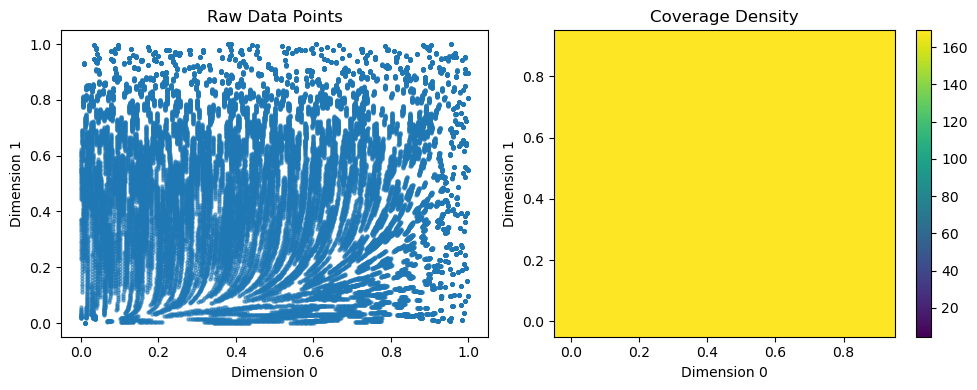

In [19]:
z_analyzer.compute_coverage_metrics(Zall_2), z_analyzer.plot_2d_coverage(Zall_2)

In [20]:
X2 = g2.inverse_transform(Zall_2)

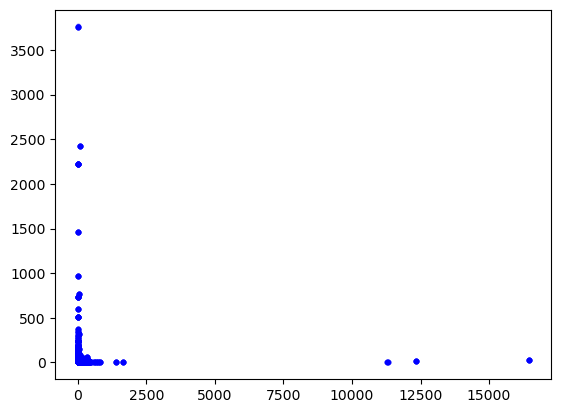

In [36]:
plt.scatter(X2[:,0],X2[:,1], s=10, c="blue", alpha=0.2)
plt.show()

In [38]:
g3 = Grid([(0, np.inf), (0, np.inf)], [10, 10],[tangent_transformation(3, alpha=0.5), tangent_transformation(3, alpha=0.5)])
sim3 = Simulator(g3, model, solver)
results3 = sim3.simulate(control,delta_t=0.1, num_samples_per_cell=19, num_steps= 19, save_result=False)

Simulation complete:
- 1900 samples × 19 timesteps = 36100 total rows
- State dimensions: 2
- Control dimensions: 1


In [39]:
initial_conditions3 = results3.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions3 = initial_conditions3[['x0', 'x1']].to_numpy()
all_data_points3 = results3[['x0', 'x1']].to_numpy()
Z0_3 = g3.transform(initial_conditions3)
Zall_3 = g3.transform(all_data_points3)

In [40]:
z_analyzer.compute_coverage_metrics(Zall_3), z_analyzer.plot_2d_coverage(Zall_3)

({'occupied_bins': np.int64(100),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(1.0),
  'max_density': np.float64(459.0),
  'min_density': np.float64(164.0),
  'hull_volume': 0.9935168711435322,
  'effective_volume': np.float64(1.1947605309015739)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

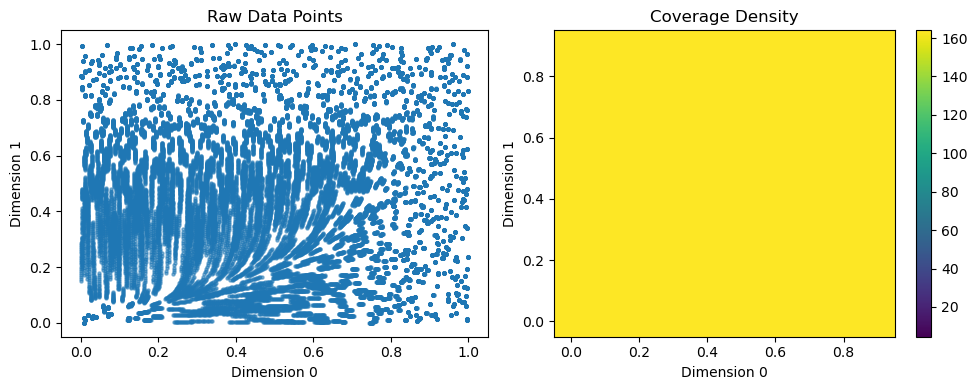

In [63]:
z_analyzer.plot_2d_coverage(Zall_3)
plt.show()

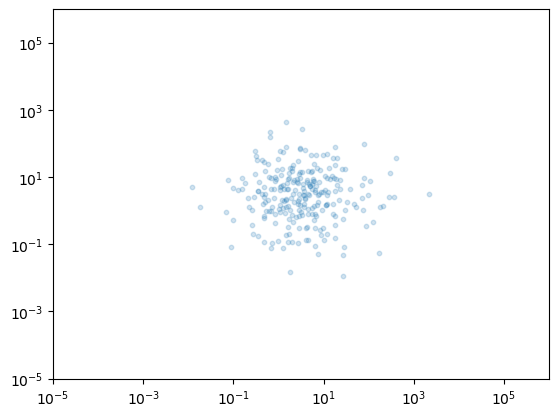

In [103]:
g2 = Grid([(0, np.inf), (0, np.inf)], [5, 5],[fractional_transformation(3), fractional_transformation(3)])
X2, _ = g2.get_initial_conditions(10)
plt.scatter(X2[:,0],X2[:,1], s=10, alpha=0.2)
plt.xscale('log')
plt.xlim(1e-5,1e6)
plt.yscale('log')
plt.ylim(1e-5,1e6)
plt.show()

In [104]:
x_analyzer2 = CoverageAnalyzer(n_bins=10, space_type='X')
x_analyzer2.compute_coverage_metrics(X2)

{'occupied_bins': np.int64(27),
 'total_bins': np.int64(100),
 'coverage_ratio': np.float64(0.27),
 'max_density': np.float64(42.0),
 'min_density': np.float64(1.0),
 'hull_volume': 493552.2008487086,
 'effective_volume': np.float64(14.383637291761264)}

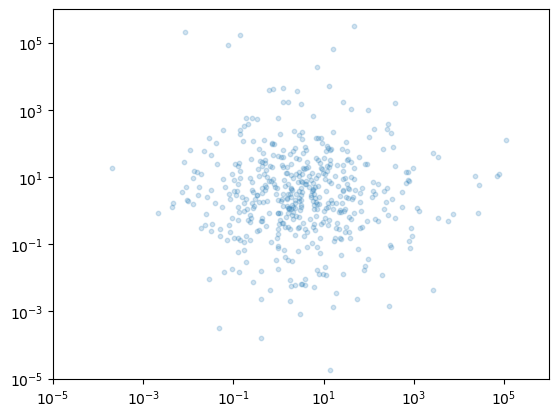

In [147]:
g3 = Grid([(0, np.inf), (0, np.inf)], [7, 7],[tangent_transformation(3, alpha=0.5), tangent_transformation(3, alpha=0.5)])
X3, _ = g3.get_initial_conditions(10)
plt.scatter(X3[:,0],X3[:,1], s=10, alpha=0.2)
plt.xscale('log')
plt.xlim(1e-5,1e6)
plt.yscale('log')
plt.ylim(1e-5,1e6)
plt.show()

In [148]:
x_analyzer3 = CoverageAnalyzer(n_bins=10, space_type='X')
x_analyzer3.compute_coverage_metrics(X3)

{'occupied_bins': np.int64(52),
 'total_bins': np.int64(100),
 'coverage_ratio': np.float64(0.52),
 'max_density': np.float64(60.0),
 'min_density': np.float64(1.0),
 'hull_volume': 989933002995.2122,
 'effective_volume': np.float64(23.446073324486875)}

In [133]:
g4 = Grid([(0, np.inf), (0, np.inf)], [7, 7],[tangent_transformation(3, alpha=0.5), tangent_transformation(3, alpha=0.5)])
sim4 = Simulator(g4, model, solver)
results4 = sim4.simulate(control,delta_t=0.1, num_samples_per_cell=10, num_steps= 10, save_result=False)

Simulation complete:
- 490 samples × 10 timesteps = 4900 total rows
- State dimensions: 2
- Control dimensions: 1


In [134]:
initial_conditions4 = results4.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions4 = initial_conditions4[['x0', 'x1']].to_numpy()
all_data_points4 = results4[['x0', 'x1']].to_numpy()
Z0_4 = g4.transform(initial_conditions4)
Zall_4 = g4.transform(all_data_points4)

In [145]:
z_analyzer.compute_coverage_metrics(Zall_4)

{'occupied_bins': np.int64(100),
 'total_bins': np.int64(100),
 'coverage_ratio': np.float64(1.0),
 'max_density': np.float64(110.0),
 'min_density': np.float64(10.0),
 'hull_volume': 0.969125080962087,
 'effective_volume': np.float64(1.2084537470369343)}

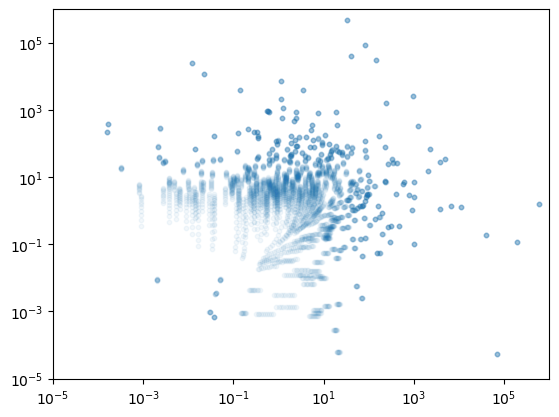

In [129]:
X4 = all_data_points4
plt.scatter(X4[:,0],X4[:,1], s=10, alpha=0.05)
plt.xscale('log')
plt.xlim(1e-5,1e6)
plt.yscale('log')
plt.ylim(1e-5,1e6)
plt.show()

In [146]:
x_analyzer4 = CoverageAnalyzer(n_bins=10, space_type='X')
x_analyzer4.compute_coverage_metrics(X4)

{'occupied_bins': np.int64(55),
 'total_bins': np.int64(100),
 'coverage_ratio': np.float64(0.55),
 'max_density': np.float64(687.0),
 'min_density': np.float64(8.0),
 'hull_volume': 4446478312489.084,
 'effective_volume': np.float64(143.04523691659426)}